#          Analysing Haberman Cancer Survival dataset                                                                                       

### Haberman's Survival Data : 
 
The dataset contains cases from a study that was conducted between 1958 and 1970
on the survival of patients who had undergone surgery for breast cancer.

### Habaerman's Dataset Attribute Description : 

* age              : Age of patient at time of operation (numerical)
* yr_of_operate    : Patient's year of operation (year - 1900, numerical)
* postv_axllry_nds : Number of positive axillary nodes detected (numerical)
* survival_stat    : Survival status (class attribute) 
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 year

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# in the given haberman's dataset, column names are not given
# so we need to provide column names to the dataset ourselves

columns_ = ['age', 'yr_of_operate', 'postv_axllry_nds', 'survival_stat']

haberman = pd.read_csv("haberman.csv", names = columns_)
haberman.head()

,age,yr_of_operate,postv_axllry_nds,survival_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Note : updating the values in "survival status" column from 1's and 2's to more meaningful values like survived and not_survived respectively.

In [3]:
# converting value of survival status i.e 1's and 2's into survived and not_survivied respectively

haberman.survival_stat = haberman['survival_stat'].map({1:"survived", 2:"not_survived"})

In [5]:
# Q) data points and features
print( haberman.shape)

(306, 4)


In [6]:
# Q) names of columns in our dataframe

print( haberman.columns)

Index(['age', 'yr_of_operate', 'postv_axllry_nds', 'survival_stat'], dtype='object')


In [7]:
# Q) datapoints for each class present?

print( haberman.survival_stat.value_counts())

# from here we can observe that our dataset here is unbalanced ;
# as the datapoints for every class are not equal
# 1 = people surviving for 5 and more years are more i.e 225 as compared to 
# 2 = people died within 5 years i.e 81

survived        225
not_survived     81
Name: survival_stat, dtype: int64


### Observation 

* From here we can observe that our dataset here is unbalanced as the datapoints for every class are not equal.
* 225 people of class "survived" (initially 1) survived for 5 or more years
* 81 people of class "not_survived" (initially 2) not sruvived for more than 5 years.

## Objective :

* Given a feature or more than one feautre (i.e paitents age, year of operation and the number of positive axillary nodes found) we need to calssify that whether a person can survive for 5 years(or more) or not .

## Univaraite Analysis

* Performing univariate analysis contains ploting and understanding ;
* PDF
* CDF
* Box Plot
* Violin Plot

Tthese analysis helps us to understand which features are useful towards classification

### PDF

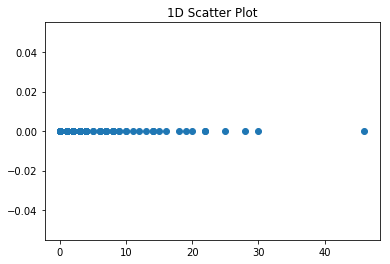

In [8]:
# 1D scatter plot

haberman_1 = haberman[haberman.survival_stat == 'survived']
haberman_2 = haberman[haberman.survival_stat == 'not_survived']

plt.plot(haberman_1['postv_axllry_nds'], np.zeros_like(haberman_1['postv_axllry_nds']), 'o')
plt.title("1D Scatter Plot")
plt.show()

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


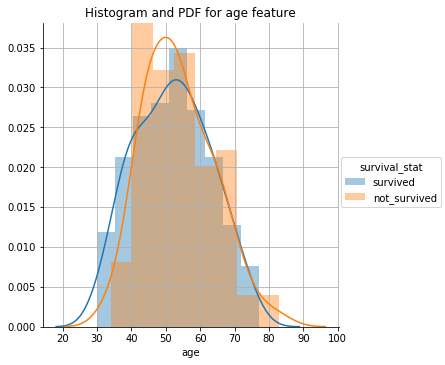

In [9]:
# histogram and pdf(probability distribution function) for "age"

sns.FacetGrid(haberman, hue = 'survival_stat', size = 5) \
    .map(sns.distplot, 'age') \
    .add_legend()
plt.title("Histogram and PDF for age feature")
plt.grid()
plt.show()
    

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


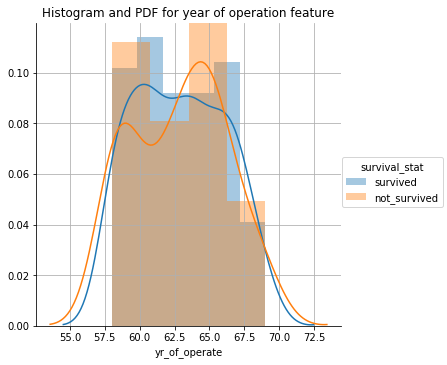

In [10]:
# histogram and pdf for "year of operation"

sns.FacetGrid(haberman, hue = 'survival_stat', size = 5 ) \
    .map(sns.distplot, 'yr_of_operate') \
    .add_legend()
plt.title("Histogram and PDF for year of operation feature")
plt.grid()
plt.show()

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


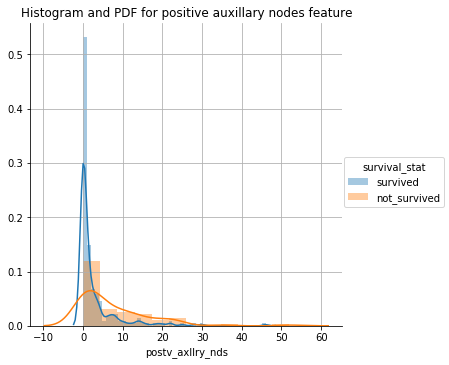

In [11]:
# histogram and pdf for "positive axillary nodes detected"

sns.FacetGrid(haberman, hue = 'survival_stat', size = 5) \
    .map(sns.distplot, 'postv_axllry_nds') \
    .add_legend()
plt.title("Histogram and PDF for positive auxillary nodes feature")
plt.grid()
plt.show()

### CDF

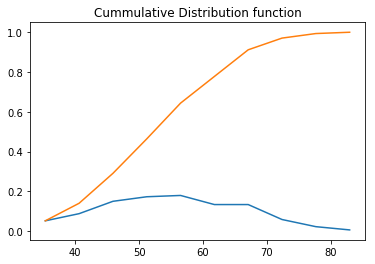

In [12]:
# CDF


counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))



#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("Cummulative Distribution function")
plt.show();

### Box Plot

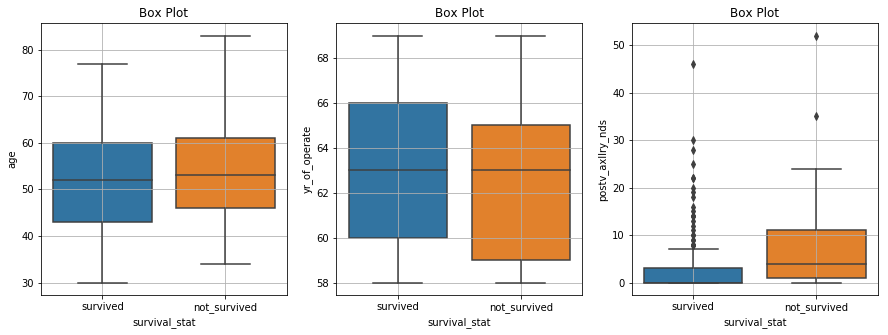

In [14]:
# BOX plot
plt.figure(1, figsize = (15,5))


plt.subplot(131)
sns.boxplot(x='survival_stat',y='age', data=haberman)
plt.title("Box Plot")
plt.grid()

plt.subplot(132)
sns.boxplot(x='survival_stat',y='yr_of_operate', data=haberman)
plt.title("Box Plot")
plt.grid()


plt.subplot(133)
sns.boxplot(x='survival_stat',y='postv_axllry_nds', data=haberman)
plt.title("Box Plot")
plt.grid()

plt.show()

### Violin Plot

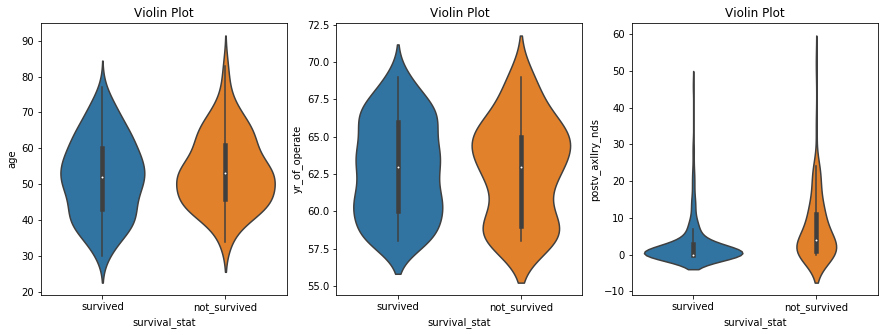

In [15]:
# violin plot

plt.figure(1, figsize = (15,5))


plt.subplot(131)
plt.title("Violin Plot")
sns.violinplot(x='survival_stat',y='age', data=haberman)

plt.subplot(132)
plt.title("Violin Plot")
sns.violinplot(x='survival_stat',y='yr_of_operate', data=haberman)

plt.subplot(133)
plt.title("Violin Plot")
sns.violinplot(x='survival_stat',y='postv_axllry_nds', data=haberman)


plt.show()

### Observations


* The number of positive axillary nodes of the survivors is highly densed from 0 to 5.

* Around 80% of the people have less than or equal to 5 positive axillary nodea.


## Bi-Variate Analysis

Performing Bi-variate analysis contains plotting of combination of features in a single plot useful in classification. 

* Scatter Plot
* Pair Plot

### Scatter Plot

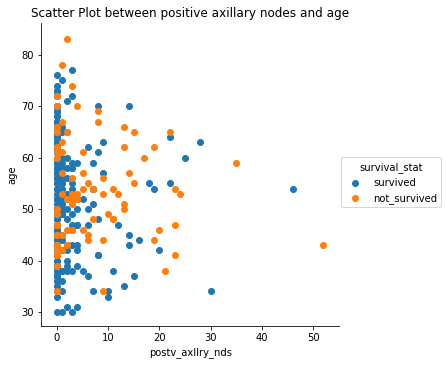

In [17]:
# scatter plot 

sns.FacetGrid(haberman, hue = "survival_stat", size = 5) \
    .map(plt.scatter, 'postv_axllry_nds', 'age') \
    .add_legend()

plt.title("Scatter Plot between positive axillary nodes and age")
plt.show()

### Observation

* A lot number of people are having positive axillayry nodes ranging between 0 and 5. 
 

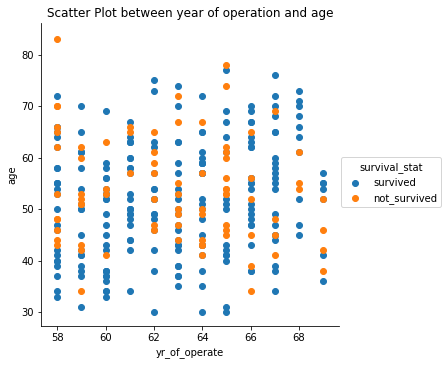

In [18]:

sns.FacetGrid(haberman, hue = 'survival_stat', size = 5) \
    .map(plt.scatter, 'yr_of_operate', 'age') \
    .add_legend()
    
plt.title("Scatter Plot between year of operation and age")
plt.show()

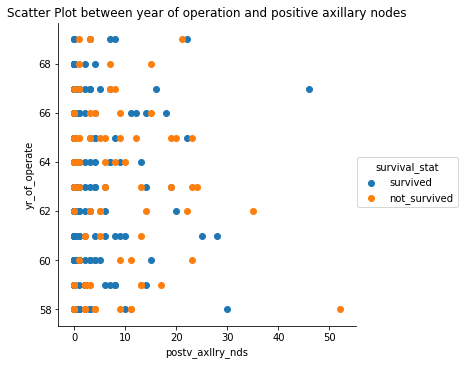

In [19]:
sns.FacetGrid(haberman, hue = "survival_stat", size = 5) \
    .map(plt.scatter, 'postv_axllry_nds', 'yr_of_operate') \
    .add_legend()

plt.title("Scatter Plot between year of operation and positive axillary nodes")
plt.show()

### Pair Plot

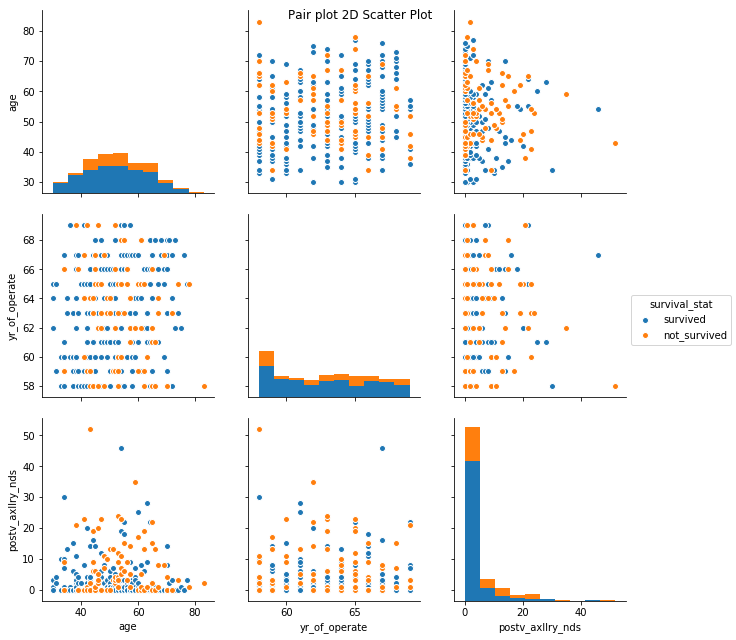

In [31]:
# Pair plot 2D scatter plot

sns.pairplot(haberman, hue = 'survival_stat', size= 3)

plt.suptitle("Pair plot 2D Scatter Plot")
plt.show()


### Observations

It is really hard to make the clear and sharp observations from this data. But here are some ;

* Scattering the data points between positive axillary nodes and year of operations, we can see the better seperation between the two clases than other scatter plots.


* Positive axillary nodes  is a useful feature to observe the survival status.

* The people survived mostly fall into 0 positive axillary nodes.
 